In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
olympics_data = pd.read_table('data/athlete_events.csv', sep=',', header=0, engine='python')

In [3]:
# Data cleanup
olympics_data = olympics_data.replace({'Medal' : { 'Gold' : 1, 'Silver' : 2, 'Bronze' : 3}})
olympics_data['Medal'] = olympics_data['Medal'].fillna(0)
olympics_data.rename(columns={'Team':'Country'}, inplace=True)
olympics_data = olympics_data.dropna()
olympics_data = olympics_data.replace({'Sex' : { 'F' : 0, 'M' : 1}})
olympics_data = olympics_data.replace({'Season' : { 'Summer' : 0, 'Winter' : 1}})
temp = olympics_data.pop('Medal')
olympics_data['Medal']=temp
sports = olympics_data['Sport'].unique()
sport_label = dict(zip(sports, range(len(sports))))
olympics_data['Sport'] = [sport_label[s] for s in olympics_data['Sport']]

In [4]:
olympics_data

,ID,Name,Sex,Age,Height,Weight,Country,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,1,24.0,180.0,80.0,China,CHN,1992 Summer,1992,0,Barcelona,0,Basketball Men's Basketball,0.0
1,2,A Lamusi,1,23.0,170.0,60.0,China,CHN,2012 Summer,2012,0,London,1,Judo Men's Extra-Lightweight,0.0
4,5,Christine Jacoba Aaftink,0,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,1,Calgary,2,Speed Skating Women's 500 metres,0.0
5,5,Christine Jacoba Aaftink,0,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,1,Calgary,2,"Speed Skating Women's 1,000 metres",0.0
6,5,Christine Jacoba Aaftink,0,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,1,Albertville,2,Speed Skating Women's 500 metres,0.0
7,5,Christine Jacoba Aaftink,0,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,1,Albertville,2,"Speed Skating Women's 1,000 metres",0.0
8,5,Christine Jacoba Aaftink,0,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,1,Lillehammer,2,Speed Skating Women's 500 metres,0.0
9,5,Christine Jacoba Aaftink,0,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,1,Lillehammer,2,"Speed Skating Women's 1,000 metres",0.0
10,6,Per Knut Aaland,1,31.0,188.0,75.0,United States,USA,1992 Winter,1992,1,Albertville,3,Cross Country Skiing Men's 10 kilometres,0.0
11,6,Per Knut Aaland,1,31.0,188.0,75.0,United States,USA,1992 Winter,1992,1,Albertville,3,Cross Country Skiing Men's 50 kilometres,0.0


In [5]:
data = olympics_data.groupby(['Country','Year'])
data.head(10)

,ID,Name,Sex,Age,Height,Weight,Country,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,1,24.0,180.0,80.0,China,CHN,1992 Summer,1992,0,Barcelona,0,Basketball Men's Basketball,0.0
1,2,A Lamusi,1,23.0,170.0,60.0,China,CHN,2012 Summer,2012,0,London,1,Judo Men's Extra-Lightweight,0.0
4,5,Christine Jacoba Aaftink,0,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,1,Calgary,2,Speed Skating Women's 500 metres,0.0
5,5,Christine Jacoba Aaftink,0,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,1,Calgary,2,"Speed Skating Women's 1,000 metres",0.0
6,5,Christine Jacoba Aaftink,0,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,1,Albertville,2,Speed Skating Women's 500 metres,0.0
7,5,Christine Jacoba Aaftink,0,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,1,Albertville,2,"Speed Skating Women's 1,000 metres",0.0
8,5,Christine Jacoba Aaftink,0,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,1,Lillehammer,2,Speed Skating Women's 500 metres,0.0
9,5,Christine Jacoba Aaftink,0,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,1,Lillehammer,2,"Speed Skating Women's 1,000 metres",0.0
10,6,Per Knut Aaland,1,31.0,188.0,75.0,United States,USA,1992 Winter,1992,1,Albertville,3,Cross Country Skiing Men's 10 kilometres,0.0
11,6,Per Knut Aaland,1,31.0,188.0,75.0,United States,USA,1992 Winter,1992,1,Albertville,3,Cross Country Skiing Men's 50 kilometres,0.0


In [6]:
summer_games = olympics_data[(olympics_data['Season'] == 0)]
summer_data = summer_games.groupby('Year')['ID'].count()
summer_data = pd.DataFrame({'Year':summer_data.index,'summer_participants':summer_data.values})
summer_data.head(10)

,Year,summer_participants
0,1896,40
1,1900,71
2,1904,119
3,1906,201
4,1908,366
5,1912,551
6,1920,428
7,1924,543
8,1928,622
9,1932,449


In [7]:
winter_games = olympics_data[(olympics_data['Season'] == 1)]
winter_data = winter_games.groupby('Year')['Year'].count()
winter_data = pd.DataFrame({'Year':winter_data.index,'winter_participants':winter_data.values})
winter_data.head(10)

,Year,winter_participants
0,1924,39
1,1928,44
2,1932,43
3,1936,69
4,1948,102
5,1952,144
6,1956,334
7,1960,512
8,1964,1343
9,1968,1801


In [8]:
all_games = pd.merge(winter_data, summer_data, how='inner', on=['Year'])
all_games.head(10)

,Year,winter_participants,summer_participants
0,1924,39,543
1,1928,44,622
2,1932,43,449
3,1936,69,827
4,1948,102,914
5,1952,144,1914
6,1956,334,2261
7,1960,512,7526
8,1964,1343,7368
9,1968,1801,8402


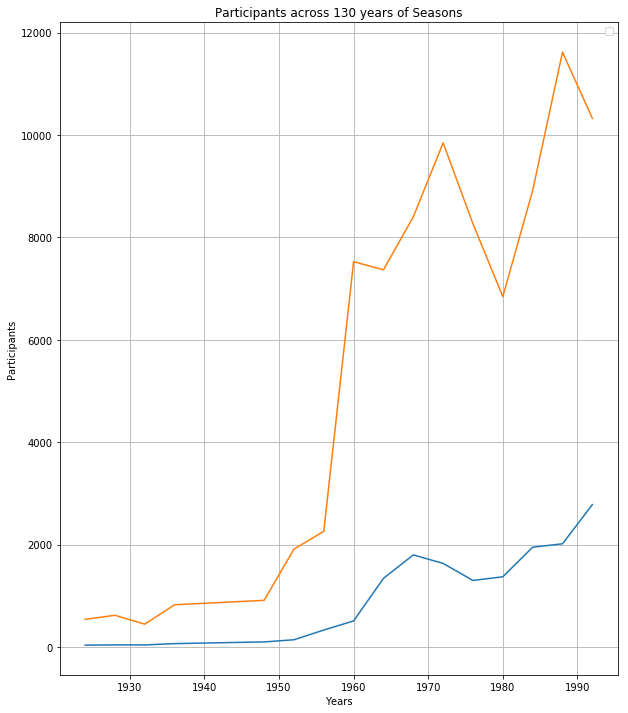

In [9]:
# Trend in Winter and Summer olympic game participants across over 130 years. 
plt.figure(figsize=(10,12)) 
plt.xlabel('Years')
plt.ylabel('Participants')
plt.legend(('Winter','Summer'))
plt.title('Participants across 130 years of Seasons')
plt.grid(True)
plt.plot(all_games['Year'], all_games['winter_participants'])
plt.plot(all_games['Year'], all_games['summer_participants'])
plt.savefig('graphs/Olympic130YearsDataParticipants.png')
plt.show()

In [10]:
gdp_data = pd.read_table('data/gdpdata.csv', sep=',', header=0, engine='python')

In [11]:
gdp_data.head(5)

,Name,2019 Population,GDP (IMF),GDP (UN '16),GDP Per Capita
0,Zimbabwe,17297.495,21.067,16.123764,1217.922017
1,Zambia,18137.369,27.217,21.063064,1500.603533
2,Yemen,29579.986,17.452,25.374086,589.993518
3,Vietnam,97429.061,264.939,205.276171,2719.301585
4,Venezuela,32779.868,92.417,291.376437,2819.321908


In [12]:
gdp_data.rename(columns={'Name':'Country'}, inplace=True)

In [13]:
gdp_data.head(5)

,Country,2019 Population,GDP (IMF),GDP (UN '16),GDP Per Capita
0,Zimbabwe,17297.495,21.067,16.123764,1217.922017
1,Zambia,18137.369,27.217,21.063064,1500.603533
2,Yemen,29579.986,17.452,25.374086,589.993518
3,Vietnam,97429.061,264.939,205.276171,2719.301585
4,Venezuela,32779.868,92.417,291.376437,2819.321908


In [14]:
gdp_games = pd.merge(olympics_data, gdp_data, how='inner', on=['Country']).sort_values(by=['Year'])
gdp_games.head(10)

,ID,Name,Sex,Age,Height,Weight,Country,NOC,Games,Year,Season,City,Sport,Event,Medal,2019 Population,GDP (IMF),GDP (UN '16),GDP Per Capita
116516,49185,Fritz Hofmann,1,24.0,167.0,56.0,Germany,GER,1896 Summer,1896,0,Athina,9,Athletics Men's Shot Put,0.0,82438.639,4416.80,3477.796274,53576.818511
119369,107613,Carl Schuhmann,1,26.0,159.0,70.0,Germany,GER,1896 Summer,1896,0,Athina,8,Gymnastics Men's Parallel Bars,0.0,82438.639,4416.80,3477.796274,53576.818511
119368,107613,Carl Schuhmann,1,26.0,159.0,70.0,Germany,GER,1896 Summer,1896,0,Athina,8,Gymnastics Men's Horse Vault,1.0,82438.639,4416.80,3477.796274,53576.818511
116512,49185,Fritz Hofmann,1,24.0,167.0,56.0,Germany,GER,1896 Summer,1896,0,Athina,9,Athletics Men's 400 metres,0.0,82438.639,4416.80,3477.796274,53576.818511
10711,22700,James Brendan Bennet Connolly,1,27.0,175.0,72.0,United States,USA,1896 Summer,1896,0,Athina,9,Athletics Men's Triple Jump,1.0,329093.110,21410.23,18624.475000,65058.274845
10710,22700,James Brendan Bennet Connolly,1,27.0,175.0,72.0,United States,USA,1896 Summer,1896,0,Athina,9,Athletics Men's Long Jump,3.0,329093.110,21410.23,18624.475000,65058.274845
15366,66362,"Francis Adonijah ""Frank"" Lane",1,21.0,170.0,69.0,United States,USA,1896 Summer,1896,0,Athina,9,Athletics Men's 100 metres,3.0,329093.110,21410.23,18624.475000,65058.274845
119370,107613,Carl Schuhmann,1,26.0,159.0,70.0,Germany,GER,1896 Summer,1896,0,Athina,8,"Gymnastics Men's Parallel Bars, Teams",1.0,82438.639,4416.80,3477.796274,53576.818511
10709,22700,James Brendan Bennet Connolly,1,27.0,175.0,72.0,United States,USA,1896 Summer,1896,0,Athina,9,Athletics Men's High Jump,2.0,329093.110,21410.23,18624.475000,65058.274845
12639,38860,"Robert ""Bob"" Garrett",1,20.0,188.0,81.0,United States,USA,1896 Summer,1896,0,Athina,9,Athletics Men's High Jump,2.0,329093.110,21410.23,18624.475000,65058.274845


In [15]:
gdp_games_1980 = gdp_games[(gdp_games['Year']==1980)]
gdp_1980_grouped = gdp_games_1980.groupby('GDP Per Capita')['GDP Per Capita'].count()
df_gdp_1980 = pd.DataFrame({'GDP':gdp_1980_grouped.index, 'participants_count':gdp_1980_grouped.values})
df_gdp_1980.head(10)

,GDP,participants_count
0,478.114064,1
1,502.750463,17
2,504.368637,29
3,616.114265,11
4,649.503015,14
5,652.557064,121
6,814.695443,48
7,873.103660,6
8,960.189123,9
9,977.543966,3


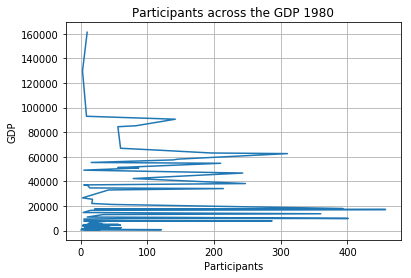

In [16]:
# Trends in GDP data over the countries for 1980 (Participants)
plt.xlabel('Participants')
plt.ylabel('GDP')
plt.title('Participants across the GDP 1980')
plt.grid(True)
plt.plot(df_gdp_1980['participants_count'],df_gdp_1980['GDP'])
plt.show()
plt.figure(figsize=(10,12)) 

In [17]:
gdp_games_1980_gold = gdp_games[(gdp_games['Year']==1980)&((gdp_games['Medal']==1.0))]
gdp_1980_gold_grouped = gdp_games_1980_gold.groupby('GDP Per Capita')['GDP Per Capita'].count()
df_gdp_1980_gold = pd.DataFrame({'GDP':gdp_1980_gold_grouped.index, 'participants_count':gdp_1980_gold_grouped.values})
df_gdp_1980_gold.head(10)

,GDP,participants_count
0,814.695443,2
1,1217.922017,15
2,2305.211898,16
3,7804.415332,8
4,9800.051197,8
5,10625.835160,4
6,13614.951425,7
7,17091.859905,3
8,17899.589668,8
9,21199.498085,1


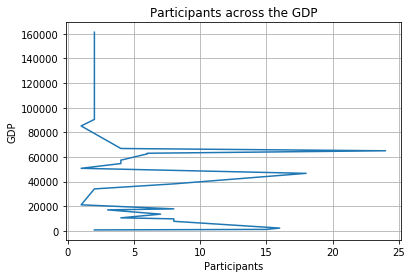

In [18]:
# Trends in GDP data over the countries for 1980 (Gold Medal Winners)
plt.xlabel('Participants')
plt.ylabel('GDP')
plt.title('Participants across the GDP')
plt.grid(True)
plt.plot(df_gdp_1980_gold['participants_count'],df_gdp_1980_gold['GDP'])
plt.show()

In [19]:
gdp_games_1980_silver = gdp_games[(gdp_games['Year']==1980)&((gdp_games['Medal']==2.0))]
gdp_1980_silver_grouped = gdp_games_1980_silver.groupby('GDP Per Capita')['GDP Per Capita'].count()
df_gdp_1980_silver = pd.DataFrame({'GDP':gdp_1980_silver_grouped.index, 'participants_count':gdp_1980_silver_grouped.values})
df_gdp_1980_silver.head(10)

,GDP,participants_count
0,649.503015,1
1,652.557064,3
2,1012.254136,2
3,2819.321908,1
4,4354.054836,2
5,7804.415332,7
6,9711.320810,1
7,9800.051197,43
8,13614.951425,15
9,17091.859905,25


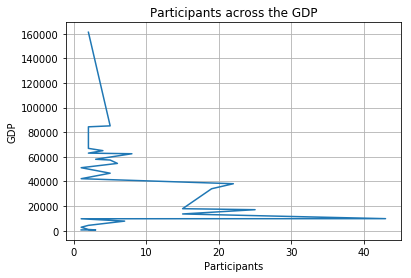

In [20]:
# Trends in GDP data over the countries for 1980 (Silver Medal Winners)
plt.xlabel('Participants')
plt.ylabel('GDP')
plt.title('Participants across the GDP')
plt.grid(True)
plt.plot(df_gdp_1980_silver['participants_count'],df_gdp_1980_silver['GDP'])
plt.show()

In [21]:
gdp_games_1980_bronze = gdp_games[(gdp_games['Year']==1980)&((gdp_games['Medal']==3.0))]
gdp_1980_bronze_grouped = gdp_games_1980_bronze.groupby('GDP Per Capita')['GDP Per Capita'].count()
df_gdp_1980_bronze = pd.DataFrame({'GDP':gdp_1980_bronze_grouped.index, 'participants_count':gdp_1980_bronze_grouped.values})
df_gdp_1980_bronze.head(10)

,GDP,participants_count
0,652.557064,2
1,814.695443,2
2,4354.054836,2
3,4972.613120,1
4,5451.876054,3
5,7804.415332,5
6,9294.382618,1
7,9711.320810,9
8,9800.051197,39
9,10625.835160,5


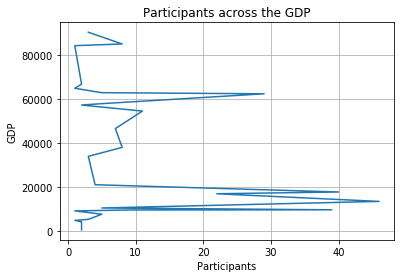

In [22]:
# Trends in GDP data over the countries for 1980 (Bronze Medal Winners)
plt.xlabel('Participants')
plt.ylabel('GDP')
plt.title('Participants across the GDP')
plt.grid(True)
plt.plot(df_gdp_1980_bronze['participants_count'],df_gdp_1980_bronze['GDP'])
plt.show()

In [23]:
gdp_games_2016 = gdp_games[(gdp_games['Year']==2016)]
gdp_2016_grouped = gdp_games_2016.groupby('GDP Per Capita')['GDP Per Capita'].count()
df_gdp_2016 = pd.DataFrame({'GDP':gdp_2016_grouped.index, 'participants_count':gdp_2016_grouped.values})
df_gdp_2016.head(10)

,GDP,participants_count
0,211.638472,3
1,356.209318,5
2,390.982557,10
3,462.404232,6
4,478.114064,8
5,483.659299,5
6,502.750463,6
7,589.993518,3
8,616.114265,3
9,649.503015,6


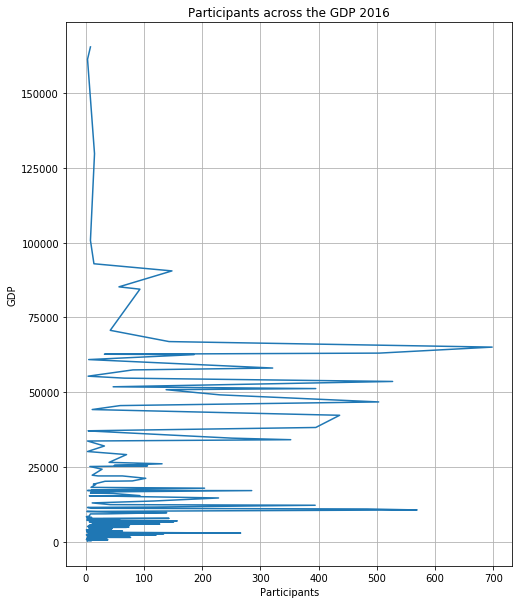

In [32]:
# Trends in GDP data over the countries for 2016 (Participants)
plt.figure(figsize=(8,10))
plt.xlabel('Participants')
plt.ylabel('GDP')
plt.title('Participants across the GDP 2016')
plt.grid(True)
plt.plot(df_gdp_2016['participants_count'],df_gdp_2016['GDP'])
plt.savefig('ParticipantsAcrossGDP2016')
plt.show()

In [25]:
gdp_games_2016_gold = gdp_games[(gdp_games['Year']==2016)&((gdp_games['Medal']==1.0))]
gdp_games_2016_gold_grouped = gdp_games_2016_gold.groupby('GDP Per Capita')['GDP Per Capita'].count()
df_gdp_games_2016_gold = pd.DataFrame({'GDP':gdp_games_2016_gold_grouped.index, 'participants_count':gdp_games_2016_gold_grouped.values})
df_gdp_games_2016_gold.head(10)

,GDP,participants_count
0,652.557064,2
1,814.695443,1
2,879.896685,1
3,1459.794032,4
4,1834.786622,6
5,2719.301585,1
6,2893.489289,2
7,4323.211108,1
8,4448.353164,1
9,4465.186758,2


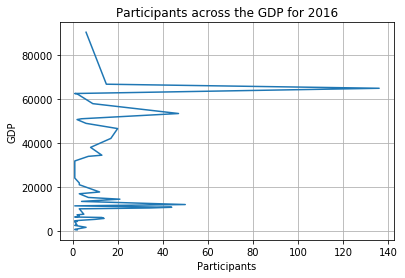

In [26]:
# Trends in GDP data over the countries for 2016 (Gold Medal Winners)
plt.xlabel('Participants')
plt.ylabel('GDP')
plt.title('Participants across the GDP for 2016')
plt.grid(True)
plt.plot(df_gdp_games_2016_gold['participants_count'],df_gdp_games_2016_gold['GDP'])
plt.show()

In [27]:
gdp_games_2016_silver = gdp_games[(gdp_games['Year']==2016)&((gdp_games['Medal']==2.0))]
gdp_games_2016_silver_grouped = gdp_games_2016_silver.groupby('GDP Per Capita')['GDP Per Capita'].count()
df_gdp_games_2016_silver = pd.DataFrame({'GDP':gdp_games_2016_silver_grouped.index, 'participants_count':gdp_games_2016_silver_grouped.values})
df_gdp_games_2016_silver.head(10)

,GDP,participants_count
0,390.982557,1
1,462.404232,1
2,652.557064,3
3,814.695443,2
4,1459.794032,2
5,1834.786622,6
6,2305.211898,1
7,2719.301585,1
8,2819.321908,1
9,2893.489289,8


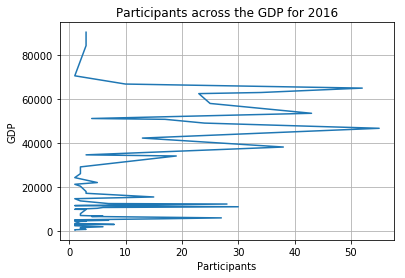

In [28]:
# Trends in GDP data over the countries for 2016 (Silver Medal Winners)
plt.xlabel('Participants')
plt.ylabel('GDP')
plt.title('Participants across the GDP for 2016')
plt.grid(True)
plt.plot(df_gdp_games_2016_silver['participants_count'],df_gdp_games_2016_silver['GDP'])
plt.show()

In [29]:
gdp_games_2016_bronze = gdp_games[(gdp_games['Year']==2016)&((gdp_games['Medal']==3.0))]
gdp_games_2016_bronze_grouped = gdp_games_2016_bronze.groupby('GDP Per Capita')['GDP Per Capita'].count()
df_gdp_games_2016_bronze = pd.DataFrame({'GDP':gdp_games_2016_bronze_grouped.index, 'participants_count':gdp_games_2016_bronze_grouped.values})
df_gdp_games_2016_bronze.head(10)

,GDP,participants_count
0,652.557064,2
1,814.695443,5
2,1459.794032,7
3,2305.211898,1
4,2366.442478,17
5,2670.229955,3
6,2819.321908,2
7,2893.489289,5
8,3522.108654,1
9,3560.672308,3


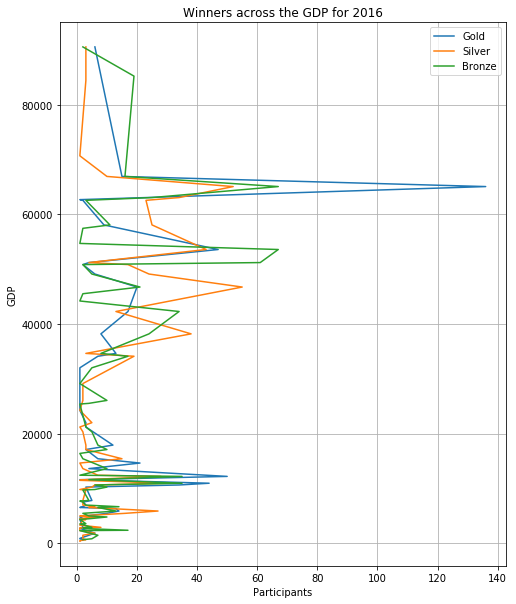

In [33]:
# Trends in GDP data over the countries for 2016
# Gold, Silver, Bronze Medal winners

plt.figure(figsize=(8,10))
plt.xlabel('Participants')
plt.ylabel('GDP')
plt.title('Winners across the GDP for 2016')
plt.grid(True)
plt.plot(df_gdp_games_2016_gold['participants_count'],df_gdp_games_2016_gold['GDP'])
plt.plot(df_gdp_games_2016_silver['participants_count'],df_gdp_games_2016_silver['GDP'])
plt.plot(df_gdp_games_2016_bronze['participants_count'],df_gdp_games_2016_bronze['GDP'])
plt.legend(('Gold','Silver','Bronze'))
plt.show()